Siddharth Bangera - L00157101
                                                                             (Supervisor: Shagufta Henna, PhD)
Coronavirus disease (COVID-19) is an infectious disease caused by severe acute respiratory syndrome SARS-CoV-2. As of 18 January 2021, around 95.9 million cases
have been reported worldwide with 2,046,818 deaths and 68.4 million recoveries. The proposed project is an attempt to analyze the trends and patterns by using
machine learning techniques on the Covid-19 dataset and interpret/predict the out-comes using visualization.

The dataset used for this project is made available at Johns-Hopkins-University
GitHub repository: https://github.com/CSSEGISandData/COVID-19 
which holds the latest data of Covid-19 figures. Few of the columns in the dataset being used are
province, country, latitude, longitude, deaths, recoveries, total cases, date. The fields
like province, countries form the categorical part whereas deaths, recoveries. etc.
form the measures.

The provided data can be used to plot graphs and visualize the
trends and patterns occurring over time. Also, certain forecasts such as predicting
the fatalities based on the statistics till date and other associated factors can be done using machine
learning techniques. Exploratory analysis and predictions can be performed for
specific countries as well thereby narrowing down the analysis. 

This dataset was
selected due to two-fold reasons, one being the fact that an ongoing/active analysis
and prediction can be performed over this which could be helpful in analyzing the
ongoing pandemic, second reason being the dataset contains huge volumes of real data which makes it an ideal Big Data Analysis Problem.

The following operations are being performed in this Notebook:

<b>>Data Loading 

<b>>Data Cleaning

<b>>Feature Engineering

<b>>Data Visualization

<b>>Machine Learning

In [0]:
# File location and type
file_location1 = "/FileStore/tables/time_series_covid19_confirmed_global-1.csv"
file_location2 = "/FileStore/tables/time_series_covid19_deaths_global-1.csv"
file_location3 = "/FileStore/tables/time_series_covid19_recovered_global-1.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
confirmed_global_cases = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location1)

deaths_global_cases = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location2)

recovered_global_cases = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location3)

file_location4 = "/FileStore/tables/time_series_covid19_confirmed_US1.csv"
file_location5 = "/FileStore/tables/time_series_covid19_deaths_US1.csv"
file_type = "csv"
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","
confirmed_us_cases = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location4)
deaths_us_cases = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location5)
file_location6 = "/FileStore/tables/train.csv"
file_type = "csv"
infer_schema = "True"
first_row_is_header = "True"
delimiter = ","
train_dataset = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location6)
file_location7 = "/FileStore/tables/Population.csv"
file_type = "csv"
infer_schema = "True"
first_row_is_header = "True"
delimiter = ","
country_population = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location7)
file_location8 = "/FileStore/tables/death_rates_from_air_pollution.csv"
file_type = "csv"
infer_schema = "True"
first_row_is_header = "True"
delimiter = ","
air_pollution_metrics = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location8)

In [0]:
#here we are converting the Date column values from mm/dd/yy format to the unix timestamp format YYYY-mm-dd
import pandas as pd
from datetime import datetime

def _convert_date_str(df):
    try:
        df.columns = list(df.columns[:4]) + [datetime.strptime(d, "%m/%d/%y").date().strftime("%Y-%m-%d") for d in df.columns[4:]]
    except:
        print('_convert_date_str failed with %y, try %Y')
        df.columns = list(df.columns[:4]) + [datetime.strptime(d, "%m/%d/%Y").date().strftime("%Y-%m-%d") for d in df.columns[4:]]

In [0]:
# Cleaning steps performed in the subsequent steps:
#     > renaming columns to better suit the values
#     > filtering out data which is not required for our analysis
#     > replacing null values
#     > pivoting/unpivoting the table as required

from pyspark.sql.functions import col
import numpy as np

confirmed_global_cases = confirmed_global_cases.withColumnRenamed("Province/State","Province_State")
confirmed_global_cases = confirmed_global_cases.withColumnRenamed("Country/Region","Country_Region")
deaths_global_cases = deaths_global_cases.withColumnRenamed("Province/State","Province_State")
deaths_global_cases = deaths_global_cases.withColumnRenamed("Country/Region","Country_Region")
recovered_global_cases = recovered_global_cases.withColumnRenamed("Province/State","Province_State")
recovered_global_cases = recovered_global_cases.withColumnRenamed("Country/Region","Country_Region")

temp_table_name1 = "confirmed_global_cases"
temp_table_name2 = "deaths_global_cases"
temp_table_name3 = "recovered_global_cases"
confirmed_global_cases.createOrReplaceTempView(temp_table_name1)
deaths_global_cases.createOrReplaceTempView(temp_table_name2)
recovered_global_cases.createOrReplaceTempView(temp_table_name3)

confirmed_global_cases = spark.sql("select * from `confirmed_global_cases` where Province_State NOT IN ('Recovered','Recovered','Grand Princess','Diamond Princess','Recovered|Grand Princess|Diamond Princess') OR Country_Region NOT IN ('US|The West Bank and Gaza', 'The West Bank and Gaza')")
deaths_global_cases = spark.sql("select * from `deaths_global_cases` where Province_State NOT IN ('Recovered','Recovered','Grand Princess','Diamond Princess','Recovered|Grand Princess|Diamond Princess') OR Country_Region NOT IN ('US|The West Bank and Gaza', 'The West Bank and Gaza')")
recovered_global_cases = spark.sql("select * from `recovered_global_cases` where Province_State NOT IN ('Recovered','Recovered','Grand Princess','Diamond Princess','Recovered|Grand Princess|Diamond Princess') OR Country_Region NOT IN ('US|The West Bank and Gaza', 'The West Bank and Gaza')")

confirmed_global_cases = confirmed_global_cases.toPandas()
deaths_global_cases = deaths_global_cases.toPandas()
recovered_global_cases = recovered_global_cases.toPandas()

removed_states = "Recovered|Grand Princess|Diamond Princess"
removed_countries = "US|The West Bank and Gaza"

confirmed_global_cases = confirmed_global_cases[~confirmed_global_cases["Province_State"].replace(np.nan, "nan").str.match(removed_states)]
deaths_global_cases    = deaths_global_cases[~deaths_global_cases["Province_State"].replace(np.nan, "nan").str.match(removed_states)]
recovered_global_cases = recovered_global_cases[~recovered_global_cases["Province_State"].replace(np.nan, "nan").str.match(removed_states)]

confirmed_global_cases = confirmed_global_cases[~confirmed_global_cases["Country_Region"].replace(np.nan, "nan").str.match(removed_countries)]
deaths_global_cases    = deaths_global_cases[~deaths_global_cases["Country_Region"].replace(np.nan, "nan").str.match(removed_countries)]
recovered_global_cases = recovered_global_cases[~recovered_global_cases["Country_Region"].replace(np.nan, "nan").str.match(removed_countries)]

In [0]:
from pyspark.sql.functions import array, col, explode, lit, struct
from pyspark.sql import DataFrame
from typing import Iterable 

def melt(
        df: DataFrame, 
        id_vars: Iterable[str], value_vars: Iterable[str], 
        var_name: str="variable", value_name: str="value") -> DataFrame:
    """Convert :class:`DataFrame` from wide to long format."""

    # Create array<struct<variable: str, value: ...>>
    _vars_and_vals = array(*(
        struct(lit(c).alias(var_name), col(c).alias(value_name)) 
        for c in value_vars))

    # Add to the DataFrame and explode
    _tmp = df.withColumn("_vars_and_vals", explode(_vars_and_vals))

    cols = id_vars + [
            col("_vars_and_vals")[x].alias(x) for x in [var_name, value_name]]
    return _tmp.select(*cols)

confirmed_global_cases = spark.createDataFrame(confirmed_global_cases)
deaths_global_cases = spark.createDataFrame(deaths_global_cases)
recovered_global_cases = spark.createDataFrame(recovered_global_cases)

confirmed_global_cases = confirmed_global_cases.na.fill({'Province_State': 'N.A.', 'Lat': '0.0', 'Long': '0'})
deaths_global_cases = deaths_global_cases.na.fill({'Province_State': 'N.A.', 'Lat': '0.0', 'Long': '0'})
recovered_global_cases = recovered_global_cases.na.fill({'Province_State': 'N.A.', 'Lat': '0.0', 'Long': '0'})
                                                            
confirmed_global_cases_melt_df = melt(confirmed_global_cases, id_vars=['Country_Region', 'Province_State', 'Lat', 'Long'], value_vars= confirmed_global_cases.columns[4:],var_name='Date', value_name='ConfirmedCases')
deaths_global_cases_melt_df = melt(deaths_global_cases, id_vars=['Country_Region', 'Province_State', 'Lat', 'Long'], value_vars= deaths_global_cases.columns[4:],var_name='Date', value_name='DeathCases')
recovered_global_cases_melt_df = melt(recovered_global_cases, id_vars=['Country_Region', 'Province_State', 'Lat', 'Long'], value_vars= recovered_global_cases.columns[4:],var_name='Date', value_name='RecoveredCases')

temp_table_name1 = "confirmed_global_cases_melt_df"
temp_table_name2 = "deaths_global_cases_melt_df"
temp_table_name3 = "recovered_global_cases_melt_df"

confirmed_global_cases_melt_df.createOrReplaceTempView(temp_table_name1)
deaths_global_cases_melt_df.createOrReplaceTempView(temp_table_name2)
recovered_global_cases_melt_df.createOrReplaceTempView(temp_table_name3)

train = spark.sql(" select a.*, b.DeathCases, c.RecoveredCases from confirmed_global_cases_melt_df a, deaths_global_cases_melt_df b, recovered_global_cases_melt_df c where a.Country_Region = b.Country_Region and a.Province_State = b.Province_State and a.Lat = b.Lat and a.Long = b.Long and a.Date = b.Date and b.Country_Region = c.Country_Region and b.Province_State = c.Province_State and b.Lat = c.Lat and b.Long = c.Long and b.Date = c.Date")

In [0]:
# Convert Date into Unix timestamp using unix_timeStamp casting
# Fill Null values in Province State by replacing with Country values using Coalasce function
# Convert Categorical Values in Country and State into numeric values using String Indexer
# Concat columns
# Remove any rows with Null Values
# find metrics new_case, growth_factor using existing columns
# combining us dataset with the overall dataset

train = train.withColumnRenamed("Country_Region","country")
train = train.withColumnRenamed("Province_State","province")
train = train.withColumnRenamed("Date","date")
train = train.withColumnRenamed("ConfirmedCases","confirmed")
train = train.withColumnRenamed("DeathCases","fatalities")
train = train.withColumnRenamed("RecoveredCases","recovered")
temp_table_name3 = "train"
train.createOrReplaceTempView(temp_table_name3)
train = train.toPandas()
train['confirmed'] = train['confirmed'].astype(float)
train['fatalities'] = train['fatalities'].astype(float)
train['recovered'] = train['recovered'].astype(float)


worldwide_dataset = train.groupby('date')[['confirmed', 'fatalities']].sum().reset_index()
url="https://raw.githubusercontent.com/bangerasiddharth/Datasets/main/ww_df.csv"
worldwide_dataset=pd.read_csv(url)
worldwide_dataset['new_case'] = worldwide_dataset['confirmed'] - worldwide_dataset['confirmed'].shift(1)
worldwide_dataset['growth_factor'] = worldwide_dataset['new_case'] / worldwide_dataset['new_case'].shift(1)
worldwide_melt = pd.melt(worldwide_dataset, id_vars=['date'], value_vars=['confirmed', 'fatalities', 'new_case'])
worldwide_melt = spark.createDataFrame(worldwide_melt)

temp_table_name3 = "worldwide_melt"
worldwide_melt.createOrReplaceTempView(temp_table_name3)
worldwide_dataset['mortality'] = worldwide_dataset['fatalities'] / worldwide_dataset['confirmed']
worldwide_dataset = spark.createDataFrame(worldwide_dataset)
temp_table_name4 = "worldwide_dataset"
worldwide_dataset.createOrReplaceTempView(temp_table_name4)

confirmed_us_cases = confirmed_us_cases.drop('UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Combined_Key').collect()
deaths_us_cases = deaths_us_cases.drop('UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Combined_Key', 'Population').collect()
confirmed_us_cases = spark.createDataFrame(confirmed_us_cases)
deaths_us_cases = spark.createDataFrame(deaths_us_cases)
confirmed_us_cases=confirmed_us_cases.toPandas()
deaths_us_cases=deaths_us_cases.toPandas()
_convert_date_str(confirmed_us_cases)
_convert_date_str(deaths_us_cases)
confirmed_us_cases = spark.createDataFrame(confirmed_us_cases)
deaths_us_cases = spark.createDataFrame(deaths_us_cases)
confirmed_us_cases = confirmed_us_cases.withColumnRenamed("Long_","Long")
deaths_us_cases = deaths_us_cases.withColumnRenamed("Long_","Long")

temp_table_name4 = "confirmed_us_cases"
temp_table_name5 = "deaths_us_cases"

confirmed_us_cases.createOrReplaceTempView(temp_table_name4)
deaths_us_cases.createOrReplaceTempView(temp_table_name5)

confirmed_us_cases = spark.sql("select * from `confirmed_us_cases` where Province_State NOT IN ('Northern Mariana Islands','Recovered','Grand Princess','Diamond Princess', 'Grand Princess','American Samoa','Diamond Princess|Grand Princess|Recovered|Northern Mariana Islands|American Samoa')")

deaths_us_cases = spark.sql("select * from `deaths_us_cases` where Province_State NOT IN ('Northern Mariana Islands','Recovered','Grand Princess','Diamond Princess', 'Grand Princess','American Samoa','Diamond Princess|Grand Princess|Recovered|Northern Mariana Islands|American Samoa')")

confirmed_us_cases = confirmed_us_cases.drop('Lat', 'Long').collect()
deaths_us_cases = deaths_us_cases.drop('Lat', 'Long').collect()
confirmed_us_cases = spark.createDataFrame(confirmed_us_cases)
deaths_us_cases = spark.createDataFrame(deaths_us_cases)
confirmed_us_melt = melt(confirmed_us_cases, id_vars=['Country_Region', 'Province_State'], value_vars= confirmed_us_cases.columns[2:],var_name='Date', value_name='ConfirmedCases')
deaths_us_melt = melt(deaths_us_cases, id_vars=['Country_Region', 'Province_State'], value_vars= deaths_us_cases.columns[2:],var_name='Date', value_name='Deaths')

temp_table_name1 = "confirmed_us_melt"
temp_table_name2 = "deaths_us_melt"

confirmed_us_melt.createOrReplaceTempView(temp_table_name1)
deaths_us_melt.createOrReplaceTempView(temp_table_name2)

confirmed_us_melt = spark.sql("select Country_Region, Province_State, Date, SUM(ConfirmedCases)  AS ConfirmedCases FROM confirmed_us_melt GROUP BY Country_Region, Province_State, Date")
deaths_us_melt = spark.sql("select Country_Region, Province_State, Date, SUM(Deaths)  AS Deaths FROM deaths_us_melt GROUP BY Country_Region, Province_State, Date")

train_usa_dataset = confirmed_us_melt.join(deaths_us_melt, on=['Country_Region', 'Province_State', 'Date'], how='inner')
train_usa_dataset = train_usa_dataset.withColumnRenamed("Country_Region","country")
train_usa_dataset = train_usa_dataset.withColumnRenamed("Province_State","province")
train_usa_dataset = train_usa_dataset.withColumnRenamed("Date","date")
train_usa_dataset = train_usa_dataset.withColumnRenamed("ConfirmedCases","confirmed")
train_usa_dataset = train_usa_dataset.withColumnRenamed("Deaths","fatalities")
train_usa_dataset = train_usa_dataset.toPandas()
train_usa_dataset['country_province'] = train_usa_dataset['country'].fillna('') + '/' + train_usa_dataset['province'].fillna('')
train_usa_dataset = spark.createDataFrame(train_usa_dataset)
train_usa_dataset = train_usa_dataset.toPandas()
train = pd.concat([train, train_usa_dataset], axis=0, sort=False)
url1="https://raw.githubusercontent.com/bangerasiddharth/Datasets/main/train2.csv"
train=pd.read_csv(url1)

<b>  > Worldwide confirmed and recovered cases over period of time
  
<b>  > Worldwide confirmed/newcases/fatalities over period of time
  
<b>  > Worldwide Mortality Rate
  
<b>  > Confirmed cases histogram
  
<b>  > Top 5 countries by confirmed cases
  
<b>  > Top 5 countries by fatalities
  
<b>  > Top 10 countries in ASIA as per their recovery percentage
  
<b>  > Top 10 countries in EUROPE as per their recovery percentage
  
<b>  > Confirmed vs Recovered Cases for Ireland (Logarithmic)
  
<b>  > Number of new cases over time for Ireland
  
<b>  > Heatmap showing correlation between cases
  
<b>  > Treemap showing total Recovered, Active and Deaths Worldwide
  
<b>  > Daily changes in covid figures
  
<b>  > Treemap showing cases worldwide and their % contribution

In [0]:
%sql
select Date, sum(confirmed) as confirmed, sum(fatalities) as fatalities, sum(recovered) as recovered from train group by Date

Date confirmed fatalities recovered 2020-02-26 79766.0 29083.0 29083.0 2020-04-13 1294096.0 395810.0 395810.0 2020-06-24 6923256.0 4021638.0 4021638.0 2020-09-12 2.2169194E7 1.6889175E7 1.6889175E7 2020-11-12 4.1946282E7 2.9881421E7 2.9881421E7 2020-06-08 5069909.0 2717737.0 2717737.0 2021-02-18 8.1496108E7 6.1278418E7 6.1278418E7 2020-06-22 6657513.0 3818657.0 3818657.0 2020-04-12 1251677.0 379682.0 379682.0 2020-06-20 6448478.0 3681976.0 3681976.0 2020-02-13 58927.0 5926.0 5926.0 2021-01-15 6.9583681E7 5.108224E7 5.108224E7 2020-04-20 1655451.0 558674.0 558674.0 2020-12-22 5.9226728E7 4.3626873E7 4.3626873E7 2020-07-25 1.1749174E7 7889247.0 7889247.0 2021-02-13 8.0109562E7 6.0051215E7 6.0051215E7 2020-12-25 6.05165E7 4.4545597E7 4.4545597E7 2020-12-17 5.7224976E7 4.2008988E7 4.2008988E7 2020-09-11 2.1924319E7 1.6683449E7 1.6683449E7 2020-06-09 5176101.0 2792895.0 2792895.0 2020-11-10 4.0968854E7 2.9370349E7 2.9370349E7 2021-02-10 7.9170663E7 5.9253194E7 5.9253194E7 2020-11-29 4.8993205E7 3.478464E7 3.478464E7 2020-08-06 1.4097842E7 9842843.0 9842843.0 2020-09-20 2.411879E7 1.8545209E7 1.8545209E7 2020-01-22 550.0 30.0 30.0 2020-12-15 5.6252377E7 4.1283854E7 4.1283854E7 2020-05-14 2948496.0 1300172.0 1300172.0 2020-06-12 5507454.0 3012202.0 3012202.0 2020-11-19 4.4883222E7 3.1866442E7 3.1866442E7 2020-12-16 5.6732639E7 4.1640113E7 4.1640113E7 2020-04-22 1753660.0 616612.0 616612.0 2020-10-18 3.1683171E7 2.4120529E7 2.4120529E7 2020-09-06 2.0731603E7 1.5709101E7 1.5709101E7 2020-10-24 3.388003E7 2.5205169E7 2.5205169E7 2020-08-29 1.8930415E7 1.4152181E7 1.4152181E7 2020-09-14 2.260444E7 1.7264282E7 1.7264282E7 2020-05-30 4208370.0 2094013.0 2094013.0 2020-05-13 2880307.0 1264373.0 1264373.0 2020-03-16 177342.0 76500.0 76500.0 2020-04-19 1611289.0 539185.0 539185.0 2020-10-20 3.2323686E7 2.4468172E7 2.4468172E7 2020-06-28 7465622.0 4385806.0 4385806.0 2020-10-29 3.586653E7 2.6583234E7 2.6583234E7 2020-03-03 91277.0 46683.0 46683.0 2021-01-12 6.8046018E7 5.0048646E7 5.0048646E7 2020-11-15 4.316868E7 3.055797E7 3.055797E7 2020-08-05 1.3872447E7 9675142.0 9675142.0 2020-10-21 3.2702421E7 2.4654105E7 2.4654105E7 2020-09-16 2.3113567E7 1.7667477E7 1.7667477E7 2020-08-25 1.7997686E7 1.3397414E7 1.3397414E7 2020-06-16 5947482.0 3308044.0 3308044.0 2020-12-12 5.5172654E7 4.0291997E7 4.0291997E7 2020-03-06 100127.0 54301.0 54301.0 2020-03-26 449755.0 119700.0 119700.0 2021-01-11 6.75741E7 4.9713396E7 4.9713396E7 2020-05-16 3087319.0 1380978.0 1380978.0 2020-10-04 2.7617314E7 2.1488643E7 2.1488643E7 2020-07-12 9498571.0 6035363.0 6035363.0 2020-06-27 7342816.0 4302708.0 4302708.0 2020-02-05 26728.0 1076.0 1076.0 2020-02-04 23082.0 826.0 826.0 2020-03-05 96279.0 52239.0 52239.0 2021-01-20 7.165045E7 5.2726329E7 5.2726329E7 2020-03-02 88705.0 44087.0 44087.0 2020-04-25 1903233.0 698550.0 698550.0 2021-01-24 7.3268898E7 5.4074259E7 5.4074259E7 2020-06-26 7206303.0 4205191.0 4205191.0 2020-12-01 4.9751783E7 3.549086E7 3.549086E7 2020-02-25 78790.0 26646.0 26646.0 2020-05-15 3018297.0 1343121.0 1343121.0 2020-08-13 1.554684E7 1.1106841E7 1.1106841E7 2020-05-20 3364301.0 1557021.0 1557021.0 2020-07-17 1.0292034E7 6687393.0 6687393.0 2020-04-10 1116304.0 339517.0 339517.0 2020-04-23 1802698.0 642197.0 642197.0 2020-06-17 6063744.0 3416806.0 3416806.0 2020-09-29 2.6316161E7 2.0474683E7 2.0474683E7 2020-02-22 76998.0 21848.0 21848.0 2020-10-15 3.0764319E7 2.3580461E7 2.3580461E7 2020-05-11 2756498.0 1184326.0 1184326.0 2020-03-25 405528.0 111649.0 111649.0 2020-08-14 1.578467E7 1.136794E7 1.136794E7 2020-12-08 5.2603483E7 3.7875785E7 3.7875785E7 2020-11-23 4.6431694E7 3.3005563E7 3.3005563E7 2020-11-08 4.0178949E7 2.8943191E7 2.8943191E7 2020-11-24 4.684112E7 3.3310565E7 3.3310565E7 2020-05-10 2700323.0 1154903.0 1154903.0 2020-04-21 1703535.0 589955.0 589955.0 2020-12-27 6.1071784E7 4.5233647E7 4.5233647E7 2020-05-26 3821507.0 1850853.0 1850853.0 2020-02-19 74062.0 15392.0 15392.0 2021-02-07 7.8284395E7 5.8428707E7 5.8428707E7 2020-12-02 5.01937

In [0]:
%sql
select * from worldwide_melt order by date desc

date variable value 2021-02-26 confirmed 8.3986127E7 2021-02-26 new_case 337331.0 2021-02-26 fatalities 1983389.0 2021-02-25 fatalities 1975793.0 2021-02-25 confirmed 8.3648796E7 2021-02-25 new_case 365933.0 2021-02-24 fatalities 1968143.0 2021-02-24 confirmed 8.3282863E7 2021-02-24 new_case 366713.0 2021-02-23 confirmed 8.291615E7 2021-02-23 new_case 312724.0 2021-02-23 fatalities 1959374.0 2021-02-22 new_case 228722.0 2021-02-22 fatalities 1950519.0 2021-02-22 confirmed 8.2603426E7 2021-02-21 new_case 254080.0 2021-02-21 fatalities 1944945.0 2021-02-21 confirmed 8.2374704E7 2021-02-20 confirmed 8.2120624E7 2021-02-20 new_case 295285.0 2021-02-20 fatalities 1940368.0 2021-02-19 fatalities 1933730.0 2021-02-19 confirmed 8.1825339E7 2021-02-19 new_case 329231.0 2021-02-18 fatalities 1925401.0 2021-02-18 confirmed 8.1496108E7 2021-02-18 new_case 329565.0 2021-02-17 confirmed 8.1166543E7 2021-02-17 new_case 321823.0 2021-02-17 fatalities 1916633.0 2021-02-16 new_case 282751.0 2021-02-16 fatalities 1907757.0 2021-02-16 confirmed 8.084472E7 2021-02-15 new_case 227159.0 2021-02-15 fatalities 1898693.0 2021-02-15 confirmed 8.0561969E7 2021-02-14 new_case 225248.0 2021-02-14 fatalities 1892810.0 2021-02-14 confirmed 8.033481E7 2021-02-13 fatalities 1887645.0 2021-02-13 confirmed 8.0109562E7 2021-02-13 new_case 281569.0 2021-02-12 fatalities 1880123.0 2021-02-12 confirmed 7.9827993E7 2021-02-12 new_case 326109.0 2021-02-11 confirmed 7.9501884E7 2021-02-11 new_case 331221.0 2021-02-11 fatalities 1870674.0 2021-02-10 confirmed 7.9170663E7 2021-02-10 new_case 336101.0 2021-02-10 fatalities 1860508.0 2021-02-09 fatalities 1850518.0 2021-02-09 confirmed 7.8834562E7 2021-02-09 new_case 328573.0 2021-02-08 fatalities 1838158.0 2021-02-08 confirmed 7.8505989E7 2021-02-08 new_case 221594.0 2021-02-07 fatalities 1831524.0 2021-02-07 confirmed 7.8284395E7 2021-02-07 new_case 304461.0 2021-02-06 fatalities 1825049.0 2021-02-06 confirmed 7.7979934E7 2021-02-06 new_case 263876.0 2021-02-05 confirmed 7.7716058E7 2021-02-05 new_case 396128.0 2021-02-05 fatalities 1817665.0 2021-02-04 new_case 337827.0 2021-02-04 fatalities 1804917.0 2021-02-04 confirmed 7.731993E7 2021-02-03 new_case 396057.0 2021-02-03 fatalities 1796262.0 2021-02-03 confirmed 7.6982103E7 2021-02-02 fatalities 1784576.0 2021-02-02 confirmed 7.6586046E7 2021-02-02 new_case 338603.0 2021-02-01 new_case 306216.0 2021-02-01 fatalities 1773287.0 2021-02-01 confirmed 7.6247443E7 2021-01-31 new_case 265443.0 2021-01-31 fatalities 1765264.0 2021-01-31 confirmed 7.5941227E7 2021-01-30 new_case 368020.0 2021-01-30 fatalities 1759220.0 2021-01-30 confirmed 7.5675784E7 2021-01-29 new_case 417465.0 2021-01-29 fatalities 1748565.0 2021-01-29 confirmed 7.5307764E7 2021-01-28 new_case 439613.0 2021-01-28 fatalities 1737416.0 2021-01-28 confirmed 7.4890299E7 2021-01-27 confirmed 7.4450686E7 2021-01-27 new_case 439419.0 2021-01-27 fatalities 1724612.0 2021-01-26 new_case 403052.0 2021-01-26 confirmed 7.4011267E7 2021-01-26 fatalities 1711998.0 2021-01-25 confirmed 7.3608215E7 2021-01-25 new_case 339317.0 2021-01-25 fatalities 1698816.0 2021-01-24 fatalities 1690214.0 2021-01-24 confirmed 7.3268898E7 2021-01-24 new_case 309315.0 2021-01-23 fatalities 1683286.0 2021-01-23 confirmed 7.2959583E7 2021-01-23 new_case 391252.0 2021-01-22 confirmed 7.2568331E7 2021-01-22 new_case 461765.0 2021-01-22 fatalities 1673455.0 2021-01-21 confirmed 7.2106566E7 2021-01-21 new_case 456116.0 2021-01-21 fatalities 1661476.0 2021-01-20 fatalities 1649051.0 2021-01-20 confirmed 7.165045E7 2021-01-20 new_case 502442.0 2021-01-19 fatalities 1635764.0 2021-01-19 confirmed 7.1148008E7 2021-01-19 new_case 425422.0 2021-01-18 confirmed 7.0722586E7 2021-01-18 new_case 364527.0 2021-01-18 fatalities 1622078.0 2021-01-17 fatalities 1614329.0 2021-01-17 confirmed 7.0358059E7 2021-01-17 new_case 343986.0 2021-01-16 fatalities 1607707.0 2021-01-16 confirmed 7.0014073E7 2021-01-16 new_case 430392.0 2021-01-15 fatalities 1598010.0 2021-

In [0]:
%sql
select * from worldwide_dataset

date confirmed fatalities new_case growth_factor mortality 2020-01-22 550 17 null null 0.03090909090909091 2020-01-23 648 17 98.0 null 0.026234567901234566 2020-01-24 928 25 280.0 2.857142857142857 0.02693965517241379 2020-01-25 1391 41 463.0 1.6535714285714285 0.029475197699496764 2020-01-26 2016 54 625.0 1.349892008639309 0.026785714285714284 2020-01-27 2775 80 759.0 1.2144 0.02882882882882883 2020-01-28 5370 129 2595.0 3.41897233201581 0.024022346368715083 2020-01-29 5905 130 535.0 0.20616570327552985 0.02201524132091448 2020-01-30 7884 168 1979.0 3.6990654205607476 0.0213089802130898 2020-01-31 9481 210 1597.0 0.8069732187973724 0.022149562282459657 2020-02-01 11508 256 2027.0 1.2692548528490921 0.02224539450816823 2020-02-02 16178 359 4670.0 2.3038973852984705 0.02219062924959822 2020-02-03 19193 423 3015.0 0.645610278372591 0.022039285156046477 2020-02-04 23082 489 3889.0 1.2898839137645108 0.021185339225370418 2020-02-05 26728 561 3646.0 0.9375160709694009 0.0209892247829991 2020-02-06 29778 631 3050.0 0.8365331870543061 0.021190140372086774 2020-02-07 33291 715 3513.0 1.1518032786885246 0.02147727614069869 2020-02-08 35935 801 2644.0 0.7526330771420439 0.022290246278001948 2020-02-09 38902 898 2967.0 1.1221633888048412 0.023083646085034187 2020-02-10 41459 1005 2557.0 0.8618132794068082 0.024240816228080754 2020-02-11 43447 1104 1988.0 0.7774736018771998 0.02541026998411858 2020-02-12 43823 1108 376.0 0.1891348088531187 0.02528352691509025 2020-02-13 58927 1358 15104.0 40.170212765957444 0.0230454630305293 2020-02-14 65421 1509 6494.0 0.4299523305084746 0.02306598798550924 2020-02-15 67528 1650 2107.0 0.3244533415460425 0.024434308731192986 2020-02-16 69683 1754 2155.0 1.022781205505458 0.025171132126917614 2020-02-17 71701 1849 2018.0 0.9364269141531323 0.025787645918466967 2020-02-18 73567 1985 1866.0 0.9246778989098117 0.026982206695937035 2020-02-19 74062 2100 495.0 0.2652733118971061 0.028354621803353946 2020-02-20 74618 2224 556.0 1.1232323232323231 0.029805140850733068 2020-02-21 75241 2228 623.0 1.120503597122302 0.029611514998471578 2020-02-22 76998 2434 1757.0 2.8202247191011236 0.031611210680796906 2020-02-23 77375 2445 377.0 0.21457029026750143 0.03159935379644588 2020-02-24 77938 2605 563.0 1.493368700265252 0.03342400369524494 2020-02-25 78790 2685 852.0 1.5133214920071048 0.03407792867115116 2020-02-26 79766 2746 976.0 1.1455399061032865 0.03442569515833814 2020-02-27 81117 2788 1351.0 1.3842213114754098 0.03437010737576587 2020-02-28 82501 2847 1384.0 1.0244263508512212 0.03450867262215004 2020-02-29 84378 2914 1877.0 1.35621387283237 0.034535068382753796 2020-03-01 86748 2967 2370.0 1.2626531699520511 0.03420251763729423 2020-03-02 88705 3051 1957.0 0.8257383966244726 0.034394904458598725 2020-03-03 91277 3125 2572.0 1.314256515074093 0.03423644510665337 2020-03-04 93549 3216 2272.0 0.8833592534992224 0.034377705801237855 2020-03-05 96279 3309 2730.0 1.2015845070422535 0.03436886548468513 2020-03-06 100127 3418 3848.0 1.4095238095238096 0.034136646458997076 2020-03-07 104051 3519 3924.0 1.0197505197505197 0.03381995367656245 2020-03-08 107874 3754 3823.0 0.9742609582059123 0.03479985909486994 2020-03-09 111958 3942 4084.0 1.0682709913680355 0.03520963218349738 2020-03-10 116590 4210 4632.0 1.1341821743388834 0.03610944334848615 2020-03-11 123856 4549 7266.0 1.5686528497409327 0.03672813589975455 2020-03-12 129198 4845 5342.0 0.7352050646848335 0.03750058050434217 2020-03-13 142873 5334 13675.0 2.559902658180457 0.037333855941990436 2020-03-14 153183 5747 10310.0 0.7539305301645338 0.037517217968051284 2020-03-15 164164 6376 10981.0 1.065082444228904 0.03883920957091689 2020-03-16 177342 7024 13178.0 1.2000728531099172 0.03960708687169424 2020-03-17 191389 7799 14047.0 1.0659432387312187 0.04074946836025059 2020-03-18 208118 8641 16729.0 1.1909304477824447 0.041519714777193704 2020-03-19 230530 9680 22412.0 1.3397094865204136 0.041990196503708846 2020-03-20 254795 11055 24265.0 1.0826789220060682 0.0433

In [0]:
# train = train.toPandas()
country_df = train.groupby(['date', 'country'])[['confirmed', 'fatalities']].sum().reset_index()
countries = country_df['country'].unique()
target_date = country_df['date'].max()

print('Date: ', target_date)
for i in [1, 100, 10000, 100000, 1000000, 10000000]:
    n_countries = len(country_df.query('(date == @target_date) & confirmed > @i'))
    print(f'{n_countries} countries have more than {i} confirmed cases')

Date: 9/9/20
1 countries have more than 1 confirmed cases
1 countries have more than 100 confirmed cases
1 countries have more than 10000 confirmed cases
1 countries have more than 100000 confirmed cases
1 countries have more than 1000000 confirmed cases
0 countries have more than 10000000 confirmed cases

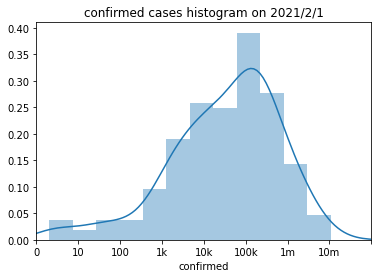

In [0]:
import seaborn as sns
ax = sns.distplot(np.log10(country_df.query('date == "2021-02-01"')['confirmed'] + 1))
ax.set_title("confirmed cases histogram on 2021/2/1")
ax.set_xlim([0, 8])
ax.set_xticks(np.arange(9))
_ = ax.set_xticklabels(['0', '10', '100', '1k', '10k', '100k', '1m', '10m'])
from matplotlib import rcParams
sns.set(rc={'figure.figsize':(15,8.27)})

In [0]:
country_df = spark.createDataFrame(country_df)
temp_table_name3 = "country_df"
country_df.createOrReplaceTempView(temp_table_name3)

In [0]:
%sql
select country, sum(confirmed) as confirmed from country_df group by country order by sum(confirmed) desc limit 5

country confirmed US 3371962793 India 1772940322 Brazil 1482134323 Russia 536394788 France 418813179

In [0]:
%sql
select country, sum(fatalities) as fatalities from country_df group by country order by sum(fatalities) desc limit 5

country fatalities US 75482145 Brazil 41564978 India 27034887 Mexico 25187790 United Kingdom 18119174

In [0]:
######################################### ASIA  ##########################################

In [0]:
%sql
select country, (recovered/confirmed)*100 as RecoveryPercentage
From
(
select country, continent, sum(confirmed) as confirmed, sum(fatalities) as fatalities, sum(recovered) as recovered
from
(
SELECT *, 
case when country in
('India',
'Indonesia',
'Pakistan',
'Bangladesh',
'Japan',
'Philippines',
'Vietnam',
'Turkey',
'Iran',
'Thailand',
'Myanmar',
'South Korea',
'Iraq',
'Afghanistan',
'Saudi Arabia',
'Uzbekistan',
'Malaysia',
'Yemen',
'Nepal',
'North Korea',
'Sri Lanka',
'Kazakhstan',
'Syria',
'Cambodia',
'Jordan',
'Azerbaijan',
'United Arab Emirates',
'Tajikistan',
'Israel',
'Laos',
'Lebanon',
'Kyrgyzstan',
'Turkmenistan',
'Singapore',
'Oman',
'State of Palestine',
'Kuwait',
'Georgia',
'Mongolia',
'Armenia',
'Qatar',
'Bahrain',
'Timor-Leste',
'Cyprus',
'Bhutan',
'Maldives',
'Brunei')
then 'ASIA'
ELSE 'REST OF THE WORLD'
END AS CONTINENT
FROM
train
)a
where continent = 'ASIA'
group by
country, continent
ORDER BY confirmed desc limit 10
)b
order by RecoveryPercentage desc

country RecoveryPercentage Saudi Arabia 91.53878329213798 India 91.03034860411819 Turkey 89.50766538976258 Israel 87.42137537741664 Pakistan 86.86905965436547 Iraq 86.5280584919386 Philippines 85.31600721713312 Iran 80.79789074883499 Indonesia 79.74811458691057 Bangladesh 77.63617013720604

In [0]:
############################## EUROPE ###############################################

In [0]:
%sql
select country, (recovered/confirmed)*100 as RecoveryPercentage From
(
SELECT country, sum(confirmed) as confirmed, sum(fatalities) as fatalities, sum(recovered) as recovered from
(
SELECT * FROM TRAIN WHERE COUNTRY IN
('Russia',
'Germany',
'United Kingdom',
'France',
'Italy',
'Spain',
'Ukraine',
'Poland',
'Romania',
'Netherlands',
'Belgium',
'Czech Republic (Czechia)',
'Greece',
'Portugal',
'Sweden',
'Hungary',
'Belarus',
'Austria',
'Serbia',
'Switzerland',
'Bulgaria',
'Denmark',
'Finland',
'Slovakia',
'Norway',
'Ireland',
'Croatia',
'Moldova',
'Bosnia and Herzegovina',
'Albania',
'Lithuania',
'North Macedonia',
'Slovenia',
'Latvia',
'Estonia',
'Montenegro',
'Luxembourg',
'Malta',
'Iceland',
'Andorra',
'Monaco',
'Liechtenstein',
'San Marino',
'Holy See'))A
group by country
ORDER BY confirmed DESC LIMIT 10)B
order by RecoveryPercentage desc

country RecoveryPercentage Germany 81.8005682052421 Russia 79.36133612154713 Poland 74.15785639250866 Italy 67.26821985092165 Ukraine 66.58705100071344 Spain 14.03249312362808 France 10.074798289175044 Belgium 4.039863512584528 Netherlands 1.3321444683833525 United Kingdom 0.28128617980347465

In [0]:
################################ IRELAND ####################################################

In [0]:

%sql
select * from train where country = 'Ireland'

country province Lat Long date confirmed fatalities recovered Ireland null 53.1424 -7.6921 2020-12-15 76776 23364 23364 Ireland null 53.1424 -7.6921 2021-01-22 184279 23364 23364 Ireland null 53.1424 -7.6921 2020-06-13 25295 22698 22698 Ireland null 53.1424 -7.6921 2020-09-05 29534 23364 23364 Ireland null 53.1424 -7.6921 2020-09-25 34315 23364 23364 Ireland null 53.1424 -7.6921 2020-07-27 25892 23364 23364 Ireland null 53.1424 -7.6921 2020-09-01 29025 23364 23364 Ireland null 53.1424 -7.6921 2020-10-06 38973 23364 23364 Ireland null 53.1424 -7.6921 2020-08-09 26712 23364 23364 Ireland null 53.1424 -7.6921 2020-09-29 35740 23364 23364 Ireland null 53.1424 -7.6921 2021-02-17 211751 23364 23364 Ireland null 53.1424 -7.6921 2020-09-15 31549 23364 23364 Ireland null 53.1424 -7.6921 2020-09-16 31799 23364 23364 Ireland null 53.1424 -7.6921 2020-10-12 43351 23364 23364 Ireland null 53.1424 -7.6921 2020-09-06 29672 23364 23364 Ireland null 53.1424 -7.6921 2020-06-26 25414 23364 23364 Ireland null 53.1424 -7.6921 2021-01-25 188923 23364 23364 Ireland null 53.1424 -7.6921 2020-06-04 25142 22698 22698 Ireland null 53.1424 -7.6921 2020-06-16 25334 22698 22698 Ireland null 53.1424 -7.6921 2020-09-26 34560 23364 23364 Ireland null 53.1424 -7.6921 2021-01-16 169780 23364 23364 Ireland null 53.1424 -7.6921 2020-04-27 19648 9233 9233 Ireland null 53.1424 -7.6921 2020-09-17 32023 23364 23364 Ireland null 53.1424 -7.6921 2020-10-30 61059 23364 23364 Ireland null 53.1424 -7.6921 2020-12-16 77197 23364 23364 Ireland null 53.1424 -7.6921 2020-03-26 1819 5 5 Ireland null 53.1424 -7.6921 2020-09-24 33994 23364 23364 Ireland null 53.1424 -7.6921 2021-01-10 147613 23364 23364 Ireland null 53.1424 -7.6921 2020-04-21 16040 9233 9233 Ireland null 53.1424 -7.6921 2020-05-30 24929 22089 22089 Ireland null 53.1424 -7.6921 2020-09-12 30730 23364 23364 Ireland null 53.1424 -7.6921 2021-01-12 155591 23364 23364 Ireland null 53.1424 -7.6921 2020-08-07 26470 23364 23364 Ireland null 53.1424 -7.6921 2021-01-29 193892 23364 23364 Ireland null 53.1424 -7.6921 2021-01-03 101887 23364 23364 Ireland null 53.1424 -7.6921 2020-01-25 0 0 0 Ireland null 53.1424 -7.6921 2020-06-30 25473 23364 23364 Ireland null 53.1424 -7.6921 2020-10-21 53422 23364 23364 Ireland null 53.1424 -7.6921 2021-01-26 189851 23364 23364 Ireland null 53.1424 -7.6921 2020-07-20 25766 23364 23364 Ireland null 53.1424 -7.6921 2020-10-09 40703 23364 23364 Ireland null 53.1424 -7.6921 2020-07-18 25750 23364 23364 Ireland null 53.1424 -7.6921 2021-02-21 215057 23364 23364 Ireland null 53.1424 -7.6921 2020-02-04 0 0 0 Ireland null 53.1424 -7.6921 2020-07-16 25698 23364 23364 Ireland null 53.1424 -7.6921 2020-11-05 64046 23364 23364 Ireland null 53.1424 -7.6921 2020-03-11 43 0 0 Ireland null 53.1424 -7.6921 2020-04-01 3447 5 5 Ireland null 53.1424 -7.6921 2020-04-12 9655 25 25 Ireland null 53.1424 -7.6921 2021-01-17 172726 23364 23364 Ireland null 53.1424 -7.6921 2020-07-02 25489 23364 23364 Ireland null 53.1424 -7.6921 2020-02-27 0 0 0 Ireland null 53.1424 -7.6921 2020-04-25 18561 9233 9233 Ireland null 53.1424 -7.6921 2020-05-15 23956 19470 19470 Ireland null 53.1424 -7.6921 2020-07-26 25881 23364 23364 Ireland null 53.1424 -7.6921 2020-11-28 71942 23364 23364 Ireland null 53.1424 -7.6921 2020-12-07 74468 23364 23364 Ireland null 53.1424 -7.6921 2021-01-27 191182 23364 23364 Ireland null 53.1424 -7.6921 2020-02-25 0 0 0 Ireland null 53.1424 -7.6921 2020-04-04 4604 25 25 Ireland null 53.1424 -7.6921 2020-11-06 64538 23364 23364 Ireland null 53.1424 -7.6921 2020-05-28 24841 22089 22089 Ireland null 53.1424 -7.6921 2020-08-16 27257 23364 23364 Ireland null 53.1424 -7.6921 2020-10-14 45243 23364 23364 Ireland null 53.1424 -7.6921 2020-11-20 69802 23364 23364 Ireland null 53.1424 -7.6921 2020-12-22 81228 23364 23364 Ireland null 53.1424 -7.6921 2020-03-24 1329 5 5 Ireland null 53.1424 -7.6921 2020-06-07 25201 22698 22698 Ireland null 53.1424 -7.6921 2020-11-27 71699 23364 23364 Ireland null 53.1424 -7.6921 2

In [0]:
irl_data = spark.sql("select * from train where country = 'Ireland'")
irl_data = irl_data.toPandas()
irl_data['confirmed'] = irl_data['confirmed'].astype(float)
irl_data['fatalities'] = irl_data['fatalities'].astype(float)
irl_data = irl_data.groupby('date')[['confirmed', 'fatalities']].sum().reset_index()
irl_data['new_case'] = irl_data['confirmed'] - irl_data['confirmed'].shift(1)
irl_data_melt = pd.melt(irl_data, id_vars=['date'], value_vars=['confirmed', 'fatalities', 'new_case'])
irl_data_melt = spark.createDataFrame(irl_data_melt)
temp_table_name3 = "irl_data_melt"
irl_data_melt.createOrReplaceTempView(temp_table_name3)

In [0]:
%sql
select date, variable, sum(value) from irl_data_melt where variable like '%new%' group by date, variable  order by sum(value) desc

date variable sum(value) 2021-01-08 new_case 8227.0 2021-01-06 new_case 7832.0 2021-01-10 new_case 6886.0 2021-01-07 new_case 6503.0 2021-01-04 new_case 6110.0 2021-01-05 new_case 5325.0 2021-01-03 new_case 4961.0 2021-01-11 new_case 4926.0 2021-01-09 new_case 4843.0 2021-01-14 new_case 3913.0 2021-01-13 new_case 3553.0 2021-01-15 new_case 3491.0 2021-01-02 new_case 3394.0 2021-01-16 new_case 3232.0 2021-01-12 new_case 3052.0 2021-01-17 new_case 2946.0 2021-01-21 new_case 2598.0 2021-01-20 new_case 2485.0 2021-01-22 new_case 2357.0 2021-01-18 new_case 2117.0 2021-01-19 new_case 1996.0 2021-01-23 new_case 1905.0 2021-01-01 new_case 1753.0 2020-12-30 new_case 1718.0 2020-12-31 new_case 1622.0 2020-12-29 new_case 1545.0 2020-04-10 new_case 1515.0 2021-01-28 new_case 1463.0 2021-01-30 new_case 1411.0 2021-01-24 new_case 1370.0 2021-01-25 new_case 1369.0 2021-01-27 new_case 1331.0 2021-02-04 new_case 1314.0 2020-12-26 new_case 1296.0 2020-10-18 new_case 1284.0 2020-10-20 new_case 1263.0 2020-10-17 new_case 1251.0 2021-01-29 new_case 1247.0 2021-01-31 new_case 1244.0 2020-10-15 new_case 1186.0 2020-10-21 new_case 1166.0 2020-10-14 new_case 1084.0 2021-02-13 new_case 1076.0 2020-04-15 new_case 1068.0 2020-10-22 new_case 1054.0 2020-10-19 new_case 1031.0 2020-12-25 new_case 1025.0 2020-10-25 new_case 1020.0 2021-02-07 new_case 1020.0 2021-02-05 new_case 1019.0 2020-10-10 new_case 1011.0 2021-02-03 new_case 1006.0 2021-02-01 new_case 1006.0 2021-02-10 new_case 999.0 2020-10-16 new_case 998.0 2020-04-13 new_case 992.0 2021-02-20 new_case 978.0 2020-12-22 new_case 961.0 2020-10-26 new_case 939.0 2020-04-23 new_case 936.0 2021-01-26 new_case 928.0 2020-12-23 new_case 927.0 2021-02-12 new_case 919.0 2020-12-24 new_case 918.0 2021-02-18 new_case 896.0 2021-02-02 new_case 871.0 2020-10-29 new_case 863.0 2021-02-11 new_case 862.0 2020-10-24 new_case 847.0 2020-04-11 new_case 839.0 2020-04-14 new_case 832.0 2021-02-08 new_case 829.0 2020-10-12 new_case 823.0 2021-02-15 new_case 820.0 2020-10-11 new_case 814.0 2020-10-13 new_case 808.0 2021-02-14 new_case 786.0 2020-10-23 new_case 785.0 2021-02-06 new_case 785.0 2020-04-18 new_case 778.0 2021-02-26 new_case 773.0 2020-12-20 new_case 766.0 2020-12-28 new_case 765.0 2020-10-30 new_case 762.0 2021-02-19 new_case 753.0 2020-11-02 new_case 748.0 2020-12-27 new_case 735.0 2020-04-12 new_case 727.0 2020-12-21 new_case 725.0 2020-04-16 new_case 724.0 2021-02-16 new_case 711.0 2020-04-17 new_case 709.0 2020-04-26 new_case 701.0 2020-10-27 new_case 700.0 2021-02-22 new_case 686.0 2021-02-21 new_case 679.0 2020-10-28 new_case 667.0 2021-02-25 new_case 638.0 2021-02-17 new_case 638.0 2020-04-22 new_case 631.0 2020-10-09 new_case 617.0 2020-10-07 new_case 611.0 2020-10-03 new_case 605.0 2020-04-24 new_case 577.0 2020-12-18 new_case 576.0 2020-11-05 new_case 563.0 2021-02-23 new_case 557.0 2020-11-01 new_case 546.0 2021-02-09 new_case 543.0 2021-02-24 new_case 540.0 2020-11-08 new_case 539.0 2020-12-19 new_case 522.0 2020-10-05 new_case 517.0 2020-10-08 new_case 502.0 2020-04-09 new_case 500.0 2020-04-19 new_case 493.0 2020-11-06 new_case 492.0 2020-12-17 new_case 481.0 2020-11-13 new_case 467.0 2020-10-02 new_case 466.0 2020-12-05 new_case 457.0 2020-11-16 new_case 453.0 2020-10-01 new_case 442.0 2020-11-04 new_case 435.0 2020-09-27 new_case 430.0 2020-12-13 new_case 429.0 2020-11-14 new_case 427.0 2020-05-14 new_case 426.0 2020-04-03 new_case 424.0 2020-10-06 new_case 424.0 2020-12-16 new_case 421.0 2020-11-19 new_case 415.0 2020-09-30 new_case 415.0 2020-04-02 new_case 402.0 2020-04-20 new_case 401.0 2020-10-31 new_case 397.0 2020-09-20 new_case 395.0 2020-04-05 new_case 390.0 2020-04-21 new_case 388.0 2020-09-28 new_case 387.0 2020-04-27 new_case 386.0 2020-11-12 new_case 385.0 2020-11-15 new_case 377.0 2020-04-25 new_case 377.0 2020-04-29 new_case 376.0 2020-11-18 new_case 372.0 2020-04-06 new_case 370.0 2020-04-08 new_case 365.0 2020-10-04 new_case 364.0 2020-09-29 new_case 363.0 2020-04-30 new_case 35

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install plotly==4.14.3
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Minmax scaler
from sklearn.preprocessing import MinMaxScaler

#itertools
import itertools

#dataframe display settings
pd.set_option('display.max_columns', 5000000)
pd.set_option('display.max_rows', 50000000)

#to suppress un-necessary warnings
import warnings  
warnings.filterwarnings('ignore')
##csv imported seperately as databricks gave lot of errors during runtime for using plotly on the existing datasets. This was a quick fix, need to analyze further
confirmed_global = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_global = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_global = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
active_group_df = pd.DataFrame(columns=[confirmed_global.columns])
active_group_df = deaths_global.copy()
base_stats = pd.DataFrame(columns=['Dates','Confirmed','Deaths','Recovered','Active'])
base_stats['Dates'] = confirmed_global.columns[4:]
base_stats['Confirmed'] = base_stats['Dates'].apply(lambda x: confirmed_global[x].sum())
base_stats['Deaths'] = base_stats['Dates'].apply(lambda x: deaths_global[x].sum())
base_stats['Recovered'] = base_stats['Dates'].apply(lambda x: recovered_global[x].sum())
base_stats.reset_index(drop=False, inplace=True)
base_stats['Active'] = base_stats['index'].apply(lambda x: (base_stats['Confirmed'][x]-(base_stats['Deaths'][x]+base_stats['Recovered'][x])))
latest_stats_fig = go.Figure()
latest_stats_fig.add_trace(go.Treemap(labels = ['Confirmed','Active','Recovered','Deaths'],
                                     parents = ['','Confirmed','Confirmed','Confirmed'],
                                     values = [base_stats['Confirmed'].sum(), base_stats['Active'].sum(), base_stats['Recovered'].sum(), base_stats['Deaths'].sum()],
                                      branchvalues="total", marker_colors = ['#118ab2','#ef476f','#06d6a0','#073b4c'],
                                      textinfo = "label+text+value",
                                      outsidetextfont = {"size": 30, "color": "darkblue"},
                                      marker = {"line": {"width": 2}},
                                        pathbar = {"visible": False}
                                     ))
latest_stats_fig.update_layout(#width=1000, 
                               height=300)
# latest_stats_fig.show()

daily_case_fig = make_subplots(rows=2, cols=2, vertical_spacing=0.05, horizontal_spacing=0.04, # shared_yaxes=True,
                           subplot_titles=('Confirmed','Active','Recovered','Deaths'),
                            x_title='Dates', y_title='# of Cases',)

daily_case_fig.add_trace(go.Bar(x=base_stats['Dates'], y=base_stats['index'].apply(lambda x: base_stats['Confirmed'][x]-base_stats['Confirmed'][x-1:x].sum()),
                              name='Confirmed',hovertemplate = '<br><b>Date</b>: %{x}'+'<br><i>Confirmed Count</i>: %{y}',
                                marker=dict(color='#118ab2')),row=1, col=1)
daily_case_fig.add_trace(go.Scatter(x=base_stats['Dates'], y=base_stats['index'].apply(lambda x: (base_stats['Confirmed'][x-7:x].sum()-base_stats['Confirmed'][x-8:x-1].sum())/7 if x>0 else 0),
                             name='7-day moving average', hovertemplate = '<br><b>Date</b>: %{x}'+'<br><i>7-day average</i>: %{y}', showlegend=False,
                                    line=dict(dash="dash", color='#149ECC')),row=1, col=1)

daily_case_fig.add_trace(go.Bar(x=base_stats['Dates'], y=base_stats['index'].apply(lambda x: base_stats['Active'][x]-base_stats['Active'][x-1:x].sum()), 
                             name='Active',hovertemplate = '<br><b>Date</b>: %{x}'+'<br><i>Active Count</i>: %{y}',
                               marker=dict(color='#ef476f')),row=1, col=2)
daily_case_fig.add_trace(go.Scatter(x=base_stats['Dates'], y=base_stats['index'].apply(lambda x: (base_stats['Active'][x-7:x].sum()-base_stats['Active'][x-8:x-1].sum())/7 if x>0 else 0),
                             name='7-day moving average', hovertemplate = '<br><b>Date</b>: %{x}'+'<br><i>7-day average</i>: %{y}', showlegend=False,
                                    line=dict(dash="dash", color='#F47C98')),row=1, col=2)

daily_case_fig.add_trace(go.Bar(x=base_stats['Dates'], y=base_stats['index'].apply(lambda x: base_stats['Recovered'][x]-base_stats['Recovered'][x-1:x].sum()), 
                              name='Recovered',hovertemplate = '<br><b>Date</b>: %{x}'+'<br><i>Recovered Count</i>: %{y}',
                               marker=dict(color='#06d6a0')),row=2, col=1)
daily_case_fig.add_trace(go.Scatter(x=base_stats['Dates'], y=base_stats['index'].apply(lambda x: (base_stats['Recovered'][x-7:x].sum()-base_stats['Recovered'][x-8:x-1].sum())/7 if x>0 else 0),
                             name='7-day moving average', hovertemplate = '<br><b>Date</b>: %{x}'+'<br><i>7-day average</i>: %{y}', showlegend=False,
                                    line=dict(dash="dash", color='#24F9C1')),row=2, col=1)

daily_case_fig.add_trace(go.Bar(x=base_stats['Dates'], y=base_stats['index'].apply(lambda x: base_stats['Deaths'][x]-base_stats['Deaths'][x-1:x].sum()), 
                              name='Deaths',hovertemplate = '<br><b>Date</b>: %{x}'+'<br><i>Death Count</i>: %{y}',
                               marker=dict(color='#073b4c')),row=2, col=2)
daily_case_fig.add_trace(go.Scatter(x=base_stats['Dates'], y=base_stats['index'].apply(lambda x: (base_stats['Deaths'][x-7:x].sum()-base_stats['Deaths'][x-8:x-1].sum())/7 if x>0 else 0),
                             name='7-day moving average', hovertemplate = '<br><b>Date</b>: %{x}'+'<br><i>7-day average</i>: %{y}', line=dict(dash="dash", color='#0C6583')),row=2, col=2)




daily_case_fig.update_xaxes(showticklabels=False)
daily_case_fig.update_layout(
    #height=600, width=1100, 
    title_text="Daily change in cases of Covid19", title_x=0.5, title_font_size=20,
                            legend=dict(orientation='h',yanchor='top',y=1.1,xanchor='right',x=1), paper_bgcolor="mintcream")


# daily_case_fig.show()                 


treemap_fig = go.Figure()
df_dict={
  "Confirmed": [confirmed_global,True],
  "Recovered": [recovered_global,False],
  "Deaths": [deaths_global,False],
  "Daily_inc": [None,False]
}
for column in ['Confirmed','Recovered','Deaths']:

    treemap_fig.add_trace(go.Treemap(labels = confirmed_global['Country/Region'], name="Treemap",
                                     parents = ['']*confirmed_global.shape[0],
                                     values = df_dict[column][0][confirmed_global.columns[-1]],
                                     branchvalues="total",
                                     textinfo = "percent root+label+value+text", outsidetextfont = {"size": 30, "color": "darkblue"},
                                     marker = {"line": {"width": 2}}, pathbar = {"visible": False}, visible = df_dict[column][1], 
                                     hovertemplate='<b>%{label} </b> <br> Count: %{value}<br>'
                                     )) 
    
treemap_fig.add_trace(go.Treemap(labels = confirmed_global.sort_values(by=confirmed_global.columns[-1], ascending=False)['Country/Region'], name="Treemap",
                                 parents = ['']*confirmed_global.shape[0],
                                 values = confirmed_global.sort_values(by=confirmed_global.columns[-1], ascending=False)['Country/Region'].apply(lambda x: confirmed_global[confirmed_global['Country/Region']==x][confirmed_global.columns[4:]].values.tolist()[0][-1]-confirmed_global[confirmed_global['Country/Region']==x][confirmed_global.columns[4:]].values.tolist()[0][-2]),
                                 branchvalues="total",
                                 textinfo = "percent root+label+value+text", outsidetextfont = {"size": 30, "color": "darkblue"},
                                 marker = {"line": {"width": 2}}, pathbar = {"visible": False}, visible = df_dict['Daily_inc'][1], 
                                 hovertemplate='<b>%{label} </b> <br> Count: %{value}<br>'
                                 )) 

treemap_fig.update_layout(
    updatemenus=[
        dict(
        buttons=list([
             dict(label = 'Confirmed',
                  method = 'update',
                  args = [{'visible': [True, False, False, False, False]},
                          {'title': 'Confirmed',
                           'showlegend':True}]),
             dict(label = 'Recovered',
                  method = 'update',
                  args = [{'visible': [False, False, True, False, False]},
                          {'title': 'Recovered',
                           'showlegend':True}]),
             dict(label = 'Deaths',
                  method = 'update',
                  args = [{'visible': [False, False, False, True, False]},
                          {'title': 'Deaths',
                           'showlegend':True}])
            ]),
             type = "buttons",
             direction="down",
#             pad={"r": 10, "t": 40},
             showactive=True,
             x=1.01,
             xanchor="left",
             y=0.8,
             yanchor="top"
        )
    ])

treemap_fig.update_layout(
    #height=600, width=1100, 
    title_text="Treemap of Countries <br> The Treemap shows the number of Cases in Different coutries <br> and their percent of total cases worldwide",
                          title_x=0.5, title_font_size=15,
                          legend=dict(orientation='h',yanchor='top',y=1.12,xanchor='right',x=1), paper_bgcolor="mintcream")
# treemap_fig.show()

corr = []
for i in base_stats.columns[2:]:
    temp = []
    for j in base_stats.columns[2:]:
        temp.append(base_stats[j].sum()/base_stats[i].sum())
    corr.append(temp)

ff_heatmap = go.Figure(data=go.Heatmap(
        z=corr,
        x=base_stats.columns[2:],
        y=base_stats.columns[2:],
        colorscale='blues'))

ff_heatmap.update_layout(title_text='title', title_x=0.5, 
                   width=600, height=600,
                   xaxis_showgrid=False,
                   yaxis_showgrid=False,
                   yaxis_autorange='reversed'
                        )
ff_heatmap.update_layout(title_text="HeatMap showing Corr. between Cases",
                                     title_x=0.5, title_font_size=20,
                                     paper_bgcolor="mintcream")#height=300, width=1100,
# ff_heatmap.show()


Requirement already satisfied: plotly==4.14.3 in /databricks/python3/lib/python3.8/site-packages (4.14.3)
Requirement already satisfied: retrying>=1.3.3 in /databricks/python3/lib/python3.8/site-packages (from plotly==4.14.3) (1.3.3)
Requirement already satisfied: six in /usr/local/lib/python3.8/site-packages (from plotly==4.14.3) (1.15.0)
 WARNING: You are using pip version 20.2.4; however, version 21.0.1 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command. 
Out[14]:

In [0]:
latest_stats_fig.show()

In [0]:
daily_case_fig.show()  

In [0]:
treemap_fig.show()

<b>Data Sources:

Time based data on Fatalities, Confirmed cases, Country and State: COVID-19 Open Research Dataset (CORD-19) prepared by the White House Office of Science and Technology Policy (OSTP) pulled together a coalition research groups and companies (including Kaggle).

Population data: World Health Organization Population stats

Pollution Data: World Health Organization Air Pollution stats (total air pollution column is dropped since it is a sum of indoor and outdoor pollution)

All the three data sources are joined based on the country value

<b>Data Modelling:

Set up Fatalities as the predictor column and rest of the columns as feaures using RFormula

Set up RFormula as the base pipeline

Set up the Regression ML Models on Pipeline

Evaluate the best model using CrossValidation with Regression evaluator and the evaluator metric R2

<b>ML Models Used:

Linear Regression: HyperParametrs (Regularization and Elastic Net)
  
Generalized Linear Regression: Families(Gaussian, Poisson)

Isotonic Regression: Parameters(Isotonic, Anotonic)

<b>Model Evaluation and Result:

Plot and Compare all the models in graph
Test the best model by applying it on Test Data
Plot the predicions againt the actual values
Calculate Coefficients and Intercept
Evaluate Regression Metrics: R2 and RMSE

<b>Features (Independent Variables)

Country_Region refers to Country
Province_State refers to the State in the country
Date refers to the date on which the numbers were recorded
ConfirmedCases refer to the number of people who tested positive for Corona virus
Population refers to the country population as a whole
Outdoor, Indoor and Ozone Pollution refers to the pollution levels in particulate matter, refer to https://www.airnow.gov/aqi/aqi-basics/ for safe levels of particulate matter

<b>Predictor (Dependent Variables)

Fatalities refer to the number of people who succumbed to the Virus

In [0]:
#Replace null values of Province_State values with corresponding Country_Region values, using Coalesce function from PySpark SQL functions
#Convert timestamp value to Numeric value, by converting into unix time


country_population = country_population.withColumnRenamed('Country', 'Country_Region')
train_dataset = train_dataset.join(country_population, ['Country_Region'])
air_pollution_metrics = air_pollution_metrics.drop('Code', 'Year', 'Air pollution (total) (deaths per 100,000)')
air_pollution_metrics = air_pollution_metrics.withColumnRenamed('Indoor air pollution (deaths per 100,000)', 'IndoorPollution')
air_pollution_metrics = air_pollution_metrics.withColumnRenamed('Outdoor particulate matter (deaths per 100,000)', 'OutdoorPollution')
air_pollution_metrics = air_pollution_metrics.withColumnRenamed('Outdoor ozone pollution (deaths per 100,000)', 'OzonePollution')
air_pollution_metrics = air_pollution_metrics.withColumnRenamed('Entity', 'Country_Region')
train_dataset = train_dataset.join(air_pollution_metrics, ['Country_Region'])
trainPD = train_dataset.toPandas()
countries = trainPD['Country_Region'].unique()
from pyspark.sql.functions import coalesce
train_dataset = train_dataset.withColumn('Province_State', coalesce('Province_State', 'Country_Region'))
temp_table_name = "train_dataset"
train_dataset.createOrReplaceTempView(temp_table_name)
train_dataset = spark.sql("select Country_Region, Province_State, concat(Date, ' 00:00:00') as Date,ConfirmedCases,Fatalities,Population,IndoorPollution,OutdoorPollution,OzonePollution from train_dataset")
train_dataset = train_dataset.dropna()
train_dataset = train_dataset.drop('ID')
from pyspark.sql.functions import unix_timestamp
train_dataset = train_dataset.withColumn('Date', unix_timestamp('Date'))

In [0]:
#Convert Categorical(String) values to Numeric Values using String Indexer

from pyspark.ml.feature import StringIndexer
indexer = StringIndexer().setInputCol("Country_Region").setOutputCol("Country")
train_dataset = indexer.fit(train_dataset).transform(train_dataset)
train_dataset = train_dataset.drop("Country_Region")

In [0]:
indexer = StringIndexer().setInputCol("Province_State").setOutputCol("State")
train_dataset = indexer.fit(train_dataset).transform(train_dataset)
train_dataset = train_dataset.drop("Province_State")

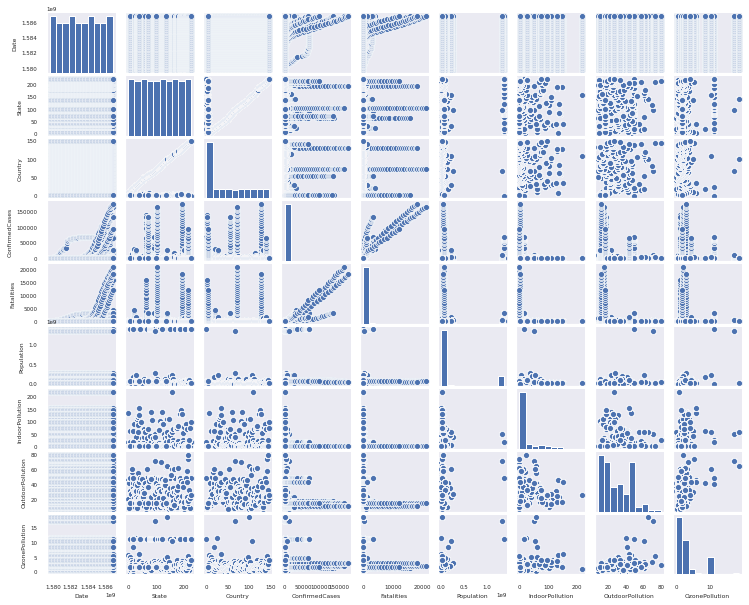

In [0]:
#View the relation between each of the colums using Seaborn pairplot

import seaborn as sns
import matplotlib.pyplot as plt

trainPD = train_dataset.toPandas()

sns.set(style="dark", font_scale=0.5)
g = sns.pairplot(trainPD, height=1.5, vars=["Date", "State","Country", "ConfirmedCases", "Fatalities", "Population", "IndoorPollution", "OutdoorPollution", "OzonePollution" ])
g.fig.set_figheight(8)
g.fig.set_figwidth(10)
display(g.fig)

In [0]:
#Summarizing Training data

curr_date = trainPD['Date'].max()
world_cum_confirmed = sum(trainPD[trainPD['Date'] == curr_date].ConfirmedCases)
world_cum_fatal = sum(trainPD[trainPD['Date'] == curr_date].Fatalities)
print('Number of Countries: ', len(trainPD['Country'].unique()))
# print('End date in train data set: ', curr_date)
print('Number of confirmed cases: ', world_cum_confirmed)
print('Number of fatalities cases: ', world_cum_fatal)
pr_confirm = trainPD['ConfirmedCases'].value_counts(normalize=True)
pr_fatal = trainPD['Fatalities'].value_counts(normalize=True)
print(f'Percentage of confirmed cases = {pr_confirm[1:].sum()*100}%')
print(f'Percentage of fatalites = {pr_fatal[1:].sum()*100}%')

Number of Countries: 149
Number of confirmed cases: 1248063.0
Number of fatalities cases: 94569.0
Percentage of confirmed cases = 56.16931216931217%
Percentage of fatalites = 29.164021164021158%

In [0]:
#Split Train Data and Test Date

train_data,test_data = train_dataset.randomSplit([0.7,0.3],24)
trainDF = train_dataset

Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). We consider two hyperparameters for tuning: Regularization Parameter, Elastic Net Parameter

Generalized linear models (GLMs) are specifications of linear models where the response variable follows some distribution from the exponential family of distributions. Here we consider two distributions in the paramgrid: Gaussian, Poisson

Isotonic regression or monotonic regression is the technique of fitting a free-form line to a sequence of observations such that the fitted line is non-decreasing (or non-increasing) everywhere, and lies as close to the observations as possible. It has one optional parameter called isotonic which specifies if the isotonic regression is isotonic or antitonic. We consider both for tuning.

In [0]:
from pyspark.ml.regression import LinearRegression, GeneralizedLinearRegression, IsotonicRegression, DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline, PipelineModel
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.feature import RFormula 

import numpy as np

columns = trainDF.columns
columns.remove('Fatalities')
formula = "{} ~ {}".format("Fatalities", " + ".join(columns))
print("Formula : {}".format(formula))
rFormula = RFormula(formula = formula)

pipeline = Pipeline(stages=[])
basePipeline =[rFormula]

lr = LinearRegression(maxIter=10)
pl_lr = basePipeline + [lr]
pg_lr = ParamGridBuilder()\
        .baseOn({pipeline.stages: pl_lr})\
        .addGrid(lr.regParam, [0.1, 0.01])\
        .addGrid(lr.elasticNetParam, [0.1, 0.8])\
        .build()


glr = GeneralizedLinearRegression()
pl_glr = basePipeline + [glr]
pg_glr = ParamGridBuilder()\
          .baseOn({pipeline.stages: pl_glr})\
          .addGrid(glr.family, ['gaussian', 'poisson'])\
          .build()


ir = IsotonicRegression()
pl_ir = basePipeline + [ir]
pg_ir = ParamGridBuilder()\
      .baseOn({pipeline.stages: pl_ir})\
      .addGrid(ir.isotonic, [True, False])\
      .build()


# dt = DecisionTreeRegressor()
# pl_dt = basePipeline + [dt]
# pg_dt = ParamGridBuilder()\
#       .baseOn({pipeline.stages: pl_dt})\
#       .build()

# One grid from the individual grids
paramGrid =  pg_lr + pg_glr + pg_ir

Formula : Fatalities ~ Date + ConfirmedCases + Population + IndoorPollution + OutdoorPollution + OzonePollution + Country + State

In [0]:
#Run the parameterized pipelines with Crossvalidation

cv = CrossValidator()\
      .setEstimator(pipeline)\
      .setEvaluator(RegressionEvaluator()\
                       .setMetricName("r2"))\
      .setEstimatorParamMaps(paramGrid)\
      .setNumFolds(10)

cvModel = cv.fit(train_data) 

In [0]:
cvModel.getEstimatorParamMaps()[ np.argmax(cvModel.avgMetrics) ]

Out[26]: {Param(parent='Pipeline_924dc552ca98', name='stages', doc='a list of pipeline stages'): [RFormula_93c8bf688c73,
 LinearRegression_bb08945888a2],
 Param(parent='LinearRegression_bb08945888a2', name='regParam', doc='regularization parameter (>= 0).'): 0.01,
 Param(parent='LinearRegression_bb08945888a2', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.1}

In [0]:
cvModel.getEstimatorParamMaps()[ np.argmin(cvModel.avgMetrics) ]

Out[27]: {Param(parent='Pipeline_924dc552ca98', name='stages', doc='a list of pipeline stages'): [RFormula_93c8bf688c73,
 IsotonicRegression_5f0972b0eac2],
 Param(parent='IsotonicRegression_5f0972b0eac2', name='isotonic', doc='whether the output sequence should be isotonic/increasing (true) orantitonic/decreasing (false).'): True}

In [0]:
import re
def paramGrid_model_name(model):
  params = [v for v in model.values() if type(v) is not list]
  name = [v[-1] for v in model.values() if type(v) is list][0]
  name = re.match(r'([a-zA-Z]*)', str(name)).groups()[0]
  return "{}{}".format(name,params)

# Resulting metric and model description
# get the measure from the CrossValidator, cvModel.avgMetrics
# get the model name & params from the paramGrid
# put them together here:
kmeans_measures = zip(cvModel.avgMetrics, [paramGrid_model_name(model) for model in paramGrid])
metrics,model_names = zip(*kmeans_measures)

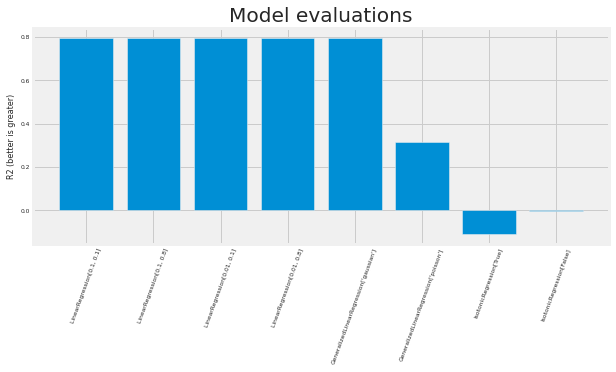

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf() # clear figure
fig = plt.figure( figsize=(10, 5))
plt.style.use('fivethirtyeight')
axis = fig.add_axes([0.1, 0.3, 0.8, 0.6])
# plot the metrics as Y
#plt.plot(range(len(model_names)),metrics)
plt.bar(range(len(model_names)),metrics)
# plot the model name & param as X labels
plt.xticks(range(len(model_names)), model_names, rotation=70, fontsize=6)
plt.yticks(fontsize=6)
#plt.xlabel('model',fontsize=8)
plt.ylabel('R2 (better is greater)',fontsize=8)
plt.title('Model evaluations')
display(plt.show())

In [0]:
#Run the best model on the test data

predictions = cvModel.transform(test_data)
display(predictions)

Date ConfirmedCases Fatalities Population IndoorPollution OutdoorPollution OzonePollution Country State features label prediction 1579651200 0.0 0.0 352721 0.135838285 8.2722671 1.686209978 66.0 94.0 Map(vectorType -> dense, length -> 8, values -> List(1.5796512E9, 0.0, 352721.0, 0.135838285, 8.2722671, 1.686209978, 66.0, 94.0)) 0.0 -7.791351151523486 1579651200 0.0 0.0 484630 0.278692043 21.86008634 1.799162733 90.0 125.0 Map(vectorType -> dense, length -> 8, values -> List(1.5796512E9, 0.0, 484630.0, 0.278692043, 21.86008634, 1.799162733, 90.0, 125.0)) 0.0 -3.8908620181882725 1579651200 0.0 0.0 622227 17.17675752 29.61053759 1.009761408 96.0 134.0 Map(vectorType -> dense, length -> 8, values -> List(1.5796512E9, 0.0, 622227.0, 17.17675752, 29.61053759, 1.009761408, 96.0, 134.0)) 0.0 8.752688607466553 1579651200 0.0 0.0 754394 24.59026121 40.63592738 11.32963327 24.0 24.0 Map(vectorType -> dense, length -> 8, values -> List(1.5796512E9, 0.0, 754394.0, 24.59026121, 40.63592738, 11.32963327, 24.0, 24.0)) 0.0 -5.76726625655283 1579651200 0.0 0.0 1189265 0.190199365 23.39594606 2.943205787 42.0 49.0 Map(vectorType -> dense, length -> 8, values -> List(1.5796512E9, 0.0, 1189265.0, 0.190199365, 23.39594606, 2.943205787, 42.0, 49.0)) 0.0 -3.0987579595803254 1579651200 0.0 0.0 1265303 3.426270277 44.60339225 0.792785212 92.0 129.0 Map(vectorType -> dense, length -> 8, values -> List(1.5796512E9, 0.0, 1265303.0, 3.426270277, 44.60339225, 0.792785212, 92.0, 129.0)) 0.0 13.354032152894433 1579651200 0.0 0.0 1308974 38.69715608 38.81393882 1.343968992 48.0 56.0 Map(vectorType -> dense, length -> 8, values -> List(1.5796512E9, 0.0, 1308974.0, 38.69715608, 38.81393882, 1.343968992, 48.0, 56.0)) 0.0 23.99556538269826 1579651200 0.0 0.0 1321977 3.932634445 11.14902884 0.644178341 49.0 57.0 Map(vectorType -> dense, length -> 8, values -> List(1.5796512E9, 0.0, 1321977.0, 3.932634445, 11.14902884, 0.644178341, 49.0, 57.0)) 0.0 -3.4477708188314864 1579651200 0.0 0.0 2781677 0.003858714 60.32076372 2.282447529 115.0 165.0 Map(vectorType -> dense, length -> 8, values -> List(1.5796512E9, 0.0, 2781677.0, 0.003858714, 60.32076372, 2.282447529, 115.0, 165.0)) 0.0 15.005569631781327 1579651200 0.0 0.0 3449299 1.25798039 17.8103914 1.541233959 144.0 214.0 Map(vectorType -> dense, length -> 8, values -> List(1.5796512E9, 0.0, 3449299.0, 1.25798039, 17.8103914, 1.541233959, 144.0, 214.0)) 0.0 -7.979140507555712 1579651200 0.0 0.0 3726549 31.72455336 36.63293489 2.933250084 54.0 69.0 Map(vectorType -> dense, length -> 8, values -> List(1.5796512E9, 0.0, 3726549.0, 31.72455336, 36.63293489, 2.933250084, 54.0, 69.0)) 0.0 15.928517357369856 1579651200 0.0 0.0 4176873 6.050155506 14.64861871 0.7392019 108.0 157.0 Map(vectorType -> dense, length -> 8, values -> List(1.5796512E9, 0.0, 4176873.0, 6.050155506, 14.64861871, 0.7392019, 108.0, 157.0)) 0.0 -3.231446282696197 1579651200 0.0 0.0 5793636 0.103695525 16.77503004 2.854666116 6.0 74.0 Map(vectorType -> dense, length -> 8, values -> List(1.5796512E9, 0.0, 5793636.0, 0.103695525, 16.77503004, 2.854666116, 6.0, 74.0)) 0.0 18.873276392232583 1579651200 0.0 0.0 7025037 10.24999951 39.32109162 2.329743218 29.0 32.0 Map(vectorType -> dense, length -> 8, values -> List(1.5796512E9, 0.0, 7025037.0, 10.24999951, 39.32109162, 2.329743218, 29.0, 32.0)) 0.0 13.240247538326003 1579651200 0.0 0.0 9587522 34.67178164 15.43252984 1.806754112 64.0 89.0 Map(vectorType -> dense, length -> 8, values -> List(1.5796512E9, 0.0, 9587522.0, 34.67178164, 15.43252984, 1.806754112, 64.0, 89.0)) 0.0 8.256308321731922 1579651200 0.0 0.0 9775564 8.064261557 28.29100413 3.578359678 65.0 93.0 Map(vectorType -> dense, length -> 8, values -> List(1.5796512E9, 0.0, 9775564.0, 8.064261557, 28.29100413, 3.578359678, 65.0, 93.0)) 0.0 0.96698433462916 1579651200 0.0 0.0 9956011 0.01931844 37.74667014 2.252344881 75.0 108.0 Map(vectorType -> dense, length -> 8, values -> List(1.5796512E9, 0.0, 9956011.0, 0.01931844, 37.74667014, 2.252344881, 75.0

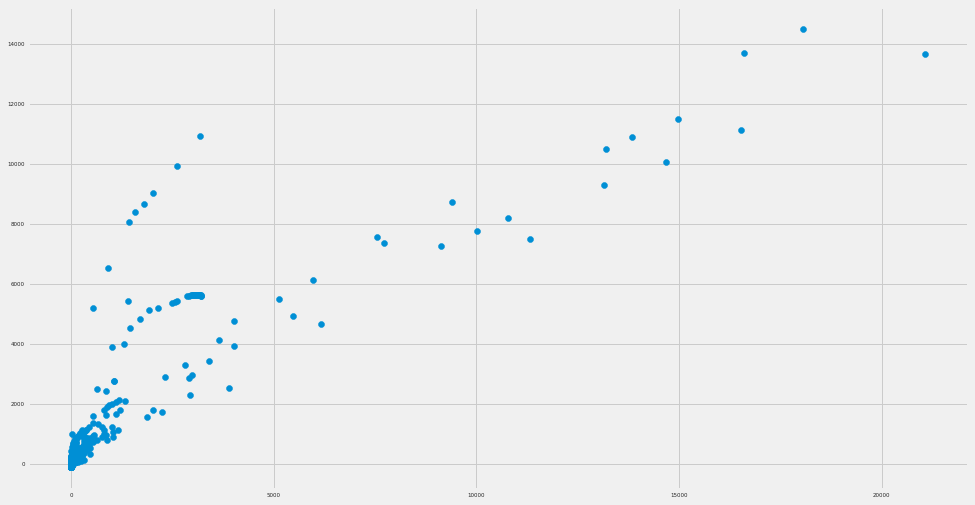

In [0]:
labeledPredictions = predictions.select("label", "prediction")
# labeledPredictions.show(5)
y_test,predictions = zip(*labeledPredictions.collect())
fig, ax = plt.subplots()
plt.scatter(y_test,predictions)
display(fig)

In [0]:
#Regression Metrics

# Summarize the model over the training set and print out some metrics
print("Best pipeline: ", cvModel.bestModel.stages)

model = cvModel.bestModel.stages[1]
print("Best model: ", model)
print("\nRFormula: ", cvModel.bestModel.stages[0])


print("\nIntercept", model.intercept)
print("Coefficients", model.coefficients)

trainingSummary = model.summary

print("\n r2: %f" % trainingSummary.r2)
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)

Best pipeline: [RFormulaModel: uid=RFormula_93c8bf688c73, resolvedFormula=ResolvedRFormula(label=Fatalities, terms=[Date,ConfirmedCases,Population,IndoorPollution,OutdoorPollution,OzonePollution,Country,State], hasIntercept=true), LinearRegressionModel: uid=LinearRegression_bb08945888a2, numFeatures=8]
Best model: LinearRegressionModel: uid=LinearRegression_bb08945888a2, numFeatures=8

RFormula: RFormulaModel(ResolvedRFormula(label=Fatalities, terms=[Date,ConfirmedCases,Population,IndoorPollution,OutdoorPollution,OzonePollution,Country,State], hasIntercept=true)) (uid=RFormula_93c8bf688c73)

Intercept 14926.113279813131
Coefficients [-9.44912556918108e-06,0.08454070082040563,-6.073277740812749e-08,0.3828638511280119,0.5753058343051254,-2.883758635234555,-0.5197752653319355,0.28506419224680674]

 r2: 0.825358
RMSE: 330.537016

> The coefficients of the features for the best linear model indicate that the features <b>Ozone pollution values and Country play a significant role 
  in the prediction of fatalities followed by Indoor and Outdoor pollution, while the <b>Population has the least influence.
  
> The RMSE and r2 value, along with the visualizations for the best model evaluated using ParamGrid and CrossValidation, show that the data (Corona Virus Fatality Growth) follows ideal linear graph at the time at which it was collected.